# 微分方程

$\dot x=ax\\其中a=-\frac{1}{T},T=5\\且x(t=0)=1$

## 已知解的形式

本例中方程的解为

$x(t)=e^{at}x_0$

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
[1.         0.81873075 0.67032005 0.54881164 0.44932896 0.36787944
 0.30119421 0.24659696 0.20189652 0.16529889 0.13533528 0.11080316
 0.09071795 0.07427358 0.06081006 0.04978707 0.0407622  0.03337327
 0.02732372 0.02237077 0.01831564 0.01499558 0.01227734 0.01005184
 0.00822975]
[1.         0.81873075 0.67032005 0.54881164 0.44932896 0.36787944
 0.30119421 0.24659696 0.20189652 0.16529889 0.13533528 0.11080316
 0.09071795 0.07427358 0.06081006 0.04978707 0.0407622  0.03337327
 0.02732372 0.02237077 0.01831564 0.01499558 0.01227734 0.01005184
 0.00822975 0.00673795]


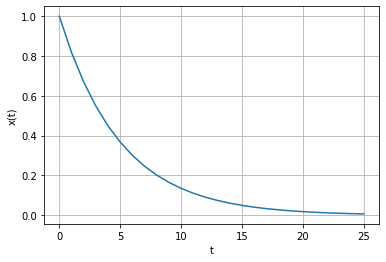

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

T = 5
a = -1 / T
x0 = 1

t_start = 0
t_end = 25

t = np.linspace(t_start, t_end, 26) #t_start与t_end之间，共25个
print(t)
print(np.arange(t_start, t_end + 1, 1))

x = np.zeros(25)
for i in range(25):
    x[i] = math.exp(a * t[i]) * x0
print(x)
x = np.exp(a * t) * x0
print(x)

plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

## 解的形式未知

### 仿真方法(欧拉法、龙格-库塔法、最小二乘法)

$\frac{x_{k+1}-x_k}{T_s}=ax_k\\x_{k+1}=(aT_s+1)x_k$

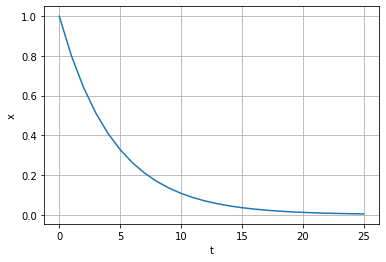

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 5
a = -1 / T
x0 = 1

Ts = 1
x = np.zeros(26)
t = np.zeros(26)
x[0] = x0
t[0] = 0

for i in range(25):
    x[i + 1] = x[i] * (a * Ts + 1)
    t[i + 1] = t[i] + Ts

plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()

### 使用odeint函数

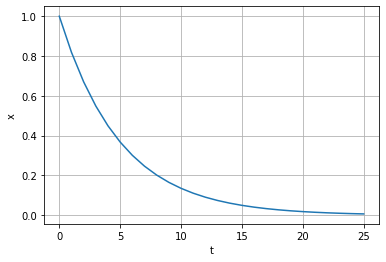

In [20]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

'''
def diff_unchange(x, t):
    T = 5
    a = -1 / T
    dxdt = a * x
    return dxdt
'''

def diff(x, t, a):
    dxdt = a * x
    return dxdt

x0 = 1

t = np.linspace(0, 25, 26)

#x = si.odeint(diff_unchange, x0 ,t)
x = si.odeint(diff, x0, t, args = (-1 / 5, ))

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()

### 一阶微分方程

$\frac{dx}{dt}=-y\\\frac{dy}{dt}=x\\且x(0)=1,y(0)=1$

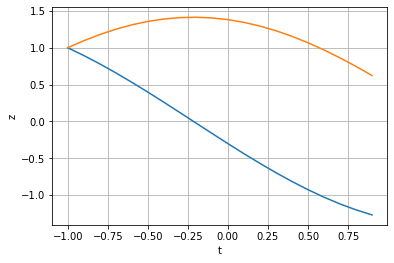

In [9]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

def diff(z, t):
    dxdt = -z[1]
    dydt = z[0]
    return [dxdt, dydt]

x0 = 1
y0 = 1

t = np.arange(-1, 1, 0.1)
z = si.odeint(diff, [x0, y0], t)

plt.plot(t,z[:, 0], t, z[:, 1])
plt.xlabel('t')
plt.ylabel('z')
plt.grid()
plt.show()

### 高阶微分方程

$(1+t^2)\ddot w +2t\dot w + 3w=2,且\dot w=1,w=0$

$令x_1=w,x_2=\dot w$

$\dot {x_1}=x_2\\\dot {x_2}=\frac{2-2tx_2-3x_1}{1+t^2}$

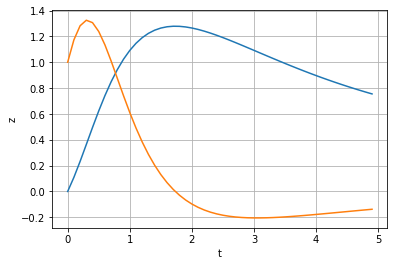

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

x1_0 = 0
x2_0 = 1

def diff(z, t):
    dx1 = z[1]
    dx2 = (2 - 2 * t * z[1] - 3 * z[0]) / (1 + t**2)
    return [dx1, dx2]

t = np.arange(0, 5, 0.1)
z = si.odeint(diff, [x1_0, x2_0], t)

plt.plot(t,z[:, 0], t, z[:, 1])
plt.xlabel('t')
plt.ylabel('z')
plt.grid()
plt.show()